In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/combined_data_EMAIL.csv')

In [ ]:
data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [ ]:
data['label'].value_counts()

,count
label,
1,43910
0,39538


In [ ]:
data.shape

(83448, 2)

In [ ]:
df = data[:40000]
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [ ]:
df['label'].value_counts()

,count
label,
1,21079
0,18921


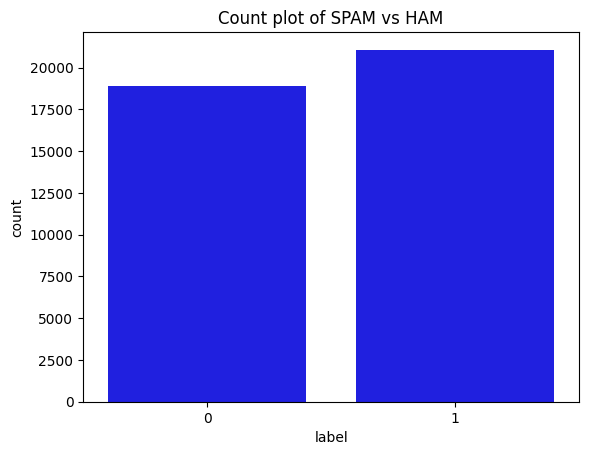

In [ ]:
sns.countplot(x='label', data=df, color = 'blue')
plt.title("Count plot of SPAM vs HAM")
plt.show()

In [ ]:
df.isna().sum()

,0
label,0
text,0


In [ ]:
df.isnull().sum()

,0
label,0
text,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   40000 non-null  int64 
 1   text    40000 non-null  object
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [19]:
import re
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

df['process_text'] = df['text'].apply(preprocess_text)

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['process_text'])
sequences = tokenizer.texts_to_sequences(df['process_text'])

In [ ]:
len(df['text'][0])

148

In [ ]:
len(df['text'][1])

808

In [ ]:
len(df['process_text'][0])

148

In [ ]:
lengths = [len(seq) for seq in sequences]
print("Max length:", max(lengths))
print("90th Percentile length:", np.percentile(lengths, 90))

Max length: 28962
90th Percentile length: 536.0999999999985


In [ ]:
max_length = 536
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['label'], test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Embedding(input_dim= 10000, output_dim=32, input_length=max_length),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    np.array(X_train), np.array(y_train),
    validation_data=(np.array(X_test), np.array(y_test)),
    epochs=15, batch_size=32
)

Epoch 1/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.5626 - loss: 0.6714 - val_accuracy: 0.5795 - val_loss: 0.6444
Epoch 2/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.5805 - loss: 0.6503 - val_accuracy: 0.5821 - val_loss: 0.6318
Epoch 3/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.6466 - loss: 0.5681 - val_accuracy: 0.7655 - val_loss: 0.4786
Epoch 4/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.7553 - loss: 0.4972 - val_accuracy: 0.4960 - val_loss: 0.6681
Epoch 5/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.6054 - loss: 0.6054 - val_accuracy: 0.9380 - val_loss: 0.1887
Epoch 6/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9470 - loss: 0.1762 - val_accuracy: 0.9710 - val_loss: 0.0892
Epoch 7/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9787 - loss: 0.0791 - val_accuracy: 0.9714 - val_loss: 0.0920
Epoch 8/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9868 -

In [ ]:
# model.save('email_spam_classifier_model.h5')

In [ ]:
# import json

# # Save the tokenizer
# tokenizer_json = tokenizer.to_json()
# with open('tokenizer.json', 'w') as f:
#     f.write(tokenizer_json)

In [ ]:
# with open('training_history.json', 'w') as f:
#     json.dump(history.history, f)

In [2]:
# Load the model
import json
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/email_spam_classifier_model.h5')

# Load the tokenizer
from tensorflow.keras.preprocessing.text import tokenizer_from_json
with open('/content/drive/MyDrive/tokenizer.json') as f:
    loaded_tokenizer = tokenizer_from_json(f.read())

# Load the history
with open('/content/drive/MyDrive/training_history.json', 'r') as f:
    loaded_history = json.load(f)



[0.5629687309265137, 0.5825625061988831, 0.7108749747276306, 0.6969062685966492, 0.7189687490463257, 0.9553437232971191, 0.9813125133514404, 0.9871875047683716, 0.9909062385559082, 0.9898124933242798, 0.9937499761581421, 0.9946249723434448, 0.9955312609672546, 0.9956250190734863, 0.9971562623977661]


In [3]:
# Extract metrics
accuracy = loaded_history['accuracy']       # Training accuracy
val_accuracy = loaded_history['val_accuracy']  # Validation accuracy
loss = loaded_history['loss']              # Training loss
val_loss = loaded_history['val_loss']      # Validation loss


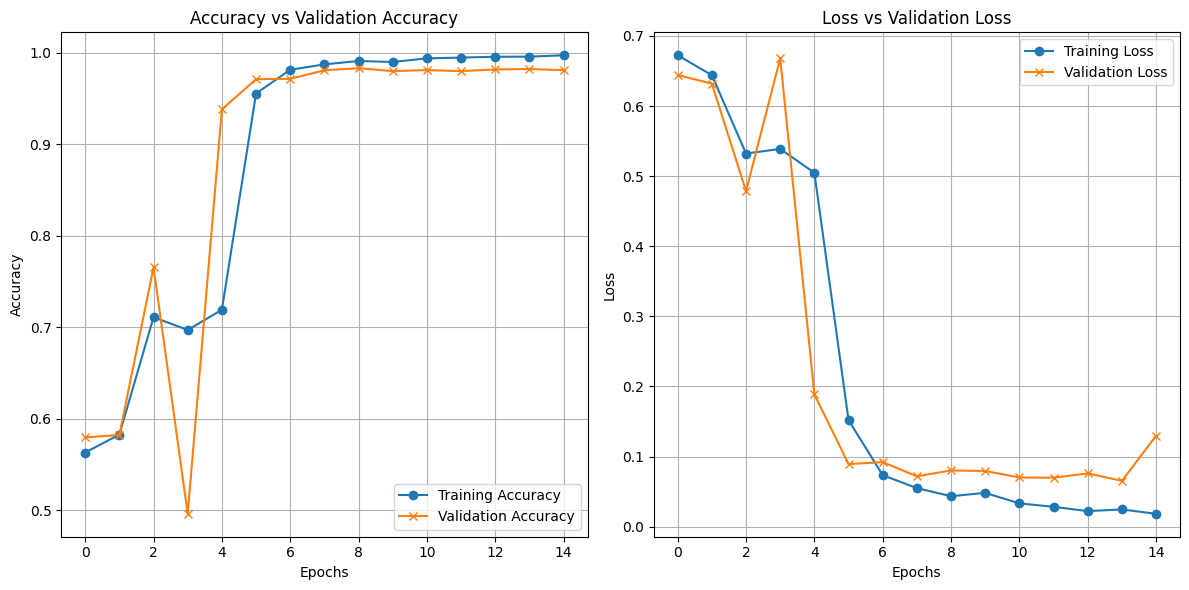

In [4]:
import matplotlib.pyplot as plt

# Create the figure
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(accuracy, label='Training Accuracy', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', marker='x')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='x')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


In [16]:
df = data[41000:50000]
df.shape

(9000, 2)

In [17]:
df

,label,text
41000,1,valiuzm\nxanvax\npapxil\nprouzac\nzolsoft\ncel...
41001,0,author obnox date escapenumber escapenumber es...
41002,0,from paul lalli on jun escapenumber escapenumb...
41003,0,hi i am using a dectalk express and was trying...
41004,1,get the finest watch replicas we only sell pre...
...,...,...
49995,0,on tue escapenumber jun escapenumber andy spie...
49996,1,dear valued member its your therapists assis...
49997,1,he could not be intended and safe here is to i...
49998,1,vip r e p l i c a w a t c h e s if you are loo...


In [20]:
X_test = df['process_text']
y_test = df['label']

In [21]:
sample_sequences = loaded_tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sample_sequences, maxlen=536, padding='post', truncating='post')

# predictions = (model.predict(sample_padded) > 0.5).astype(int)
# for text, pred in zip(sample_texts, predictions):
#     label = "Spam" if pred == 1 else "Ham"
#     print(f"Text: {text} -> {label}")

In [22]:
loss, accuracy = loaded_model.evaluate(X_test, y_test)
accuracy

282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9783 - loss: 0.1493


0.9781110882759094

In [24]:
predictions = (loaded_model.predict(X_test) > 0.5).astype(int)


282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [25]:
cm = confusion_matrix(y_test, predictions)
cm

array([[4196,   79],
       [ 118, 4607]])

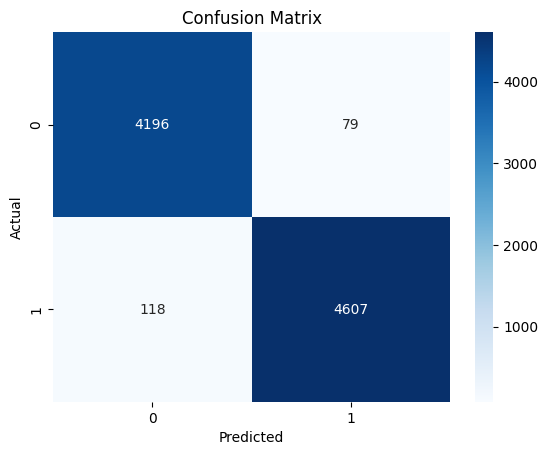

In [26]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
report = classification_report(y_test, predictions)
print(report)

print("F1_score: ", f1_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4275
           1       0.98      0.98      0.98      4725

    accuracy                           0.98      9000
   macro avg       0.98      0.98      0.98      9000
weighted avg       0.98      0.98      0.98      9000

F1_score:  0.9790670491977473
Precision:  0.9831412718736663
Recall:  0.975026455026455
